##Importing the Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


##Loading the dataset

In [ ]:
d_frm=pd.read_csv('SampleSuperstore.csv')

##Info of data_frame

In [ ]:
print("Info of the data set: ")
d_frm.info()

Info of the data set: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
print("Preview of the data: ")
d_frm.head()

Preview of the data: 


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
print("Dimensions of the data set: ")
print(d_frm.shape)
print(d_frm.ndim)

Dimensions of the data set: 
(9994, 13)
2


In [ ]:
print("All column elements: ")
print(d_frm.columns)


All column elements: 
Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


### Checking if there are null or NA elements in the data set


In [ ]:
print("Checking number of null elements in each column: ")
print(d_frm.isnull().sum())

Checking number of null elements in each column: 
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [ ]:
d_frm.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#Summary of the data type object
d_frm.describe(include='O')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [ ]:
print("Displaying all unique elements: ")
print(d_frm['Category'].unique())
print(d_frm['Country'].unique())
print(d_frm['Ship Mode'].unique())
print(d_frm['Segment'].unique())
print(d_frm['Sub-Category'].unique())
print(d_frm['Region'].unique())

Displaying all unique elements: 
['Furniture' 'Office Supplies' 'Technology']
['United States']
['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['South' 'West' 'Central' 'East']


## Working with the data set


In [ ]:
d_frm['Category'].value_counts().sum()
Cat_per = d_frm['Category'].value_counts().to_frame().sort_index()
Cat_per['percentage %'] = (Cat_per['Category'] / d_frm['Category'].value_counts().sum())*100
Cat_per

,Category,percentage %
Furniture,2121,21.222734
Office Supplies,6026,60.296178
Technology,1847,18.481089


<Axes: >

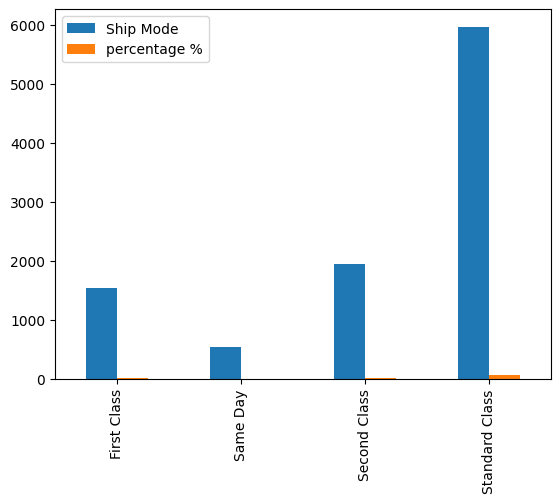

In [88]:
d_frm['Ship Mode'].value_counts().sum()
ships_per = d_frm['Ship Mode'].value_counts().to_frame().sort_index()
ships_per['percentage %'] = (ships_per['Ship Mode'] / d_frm['Ship Mode'].value_counts().sum())*100
ships_per.plot.bar()

In [ ]:
d_frm['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [ ]:
d_frm['Segment'].value_counts().sum()
segmen_per = d_frm['Segment'].value_counts().to_frame().sort_index()
segmen_per['percentage %'] = (segmen_per['Segment'] /d_frm['Segment'].value_counts().sum())*100
segmen_per

,Segment,percentage %
Consumer,5191,51.941165
Corporate,3020,30.218131
Home Office,1783,17.840704


#### Removing the unwanted info or column


In [ ]:
d_frm.drop(columns='Postal Code',inplace=True)
d_frm.drop_duplicates()
d_frm.head(1)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136


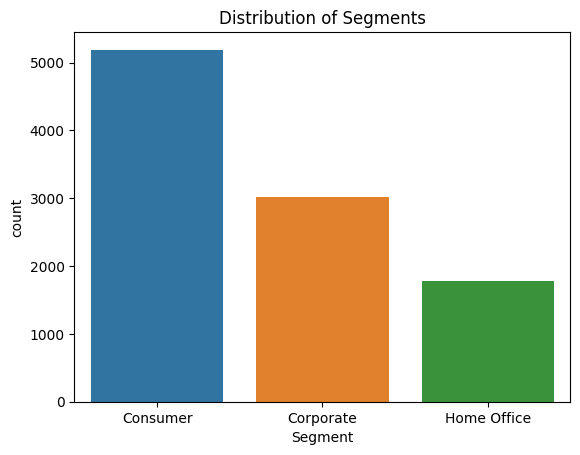

In [ ]:
data=pd.read_csv("SampleSuperstore.csv")
data = pd.read_csv("SampleSuperstore.csv")
sns.countplot(data=data, x='Segment')
plt.title('Distribution of Segments')
plt.show()

In the Home Office Segment, we observe that the count is less. So convergent strategy and improvement is a necessity for this Segment.

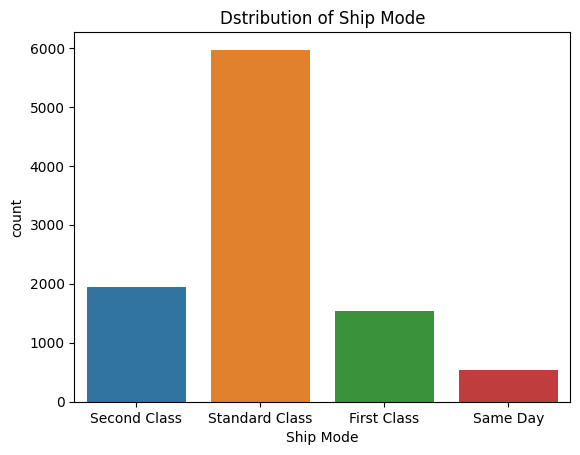

In [ ]:
sns.countplot(data=data,x='Ship Mode')
plt.title('Dstribution of Ship Mode')
plt.show()


#### Distribution based on States

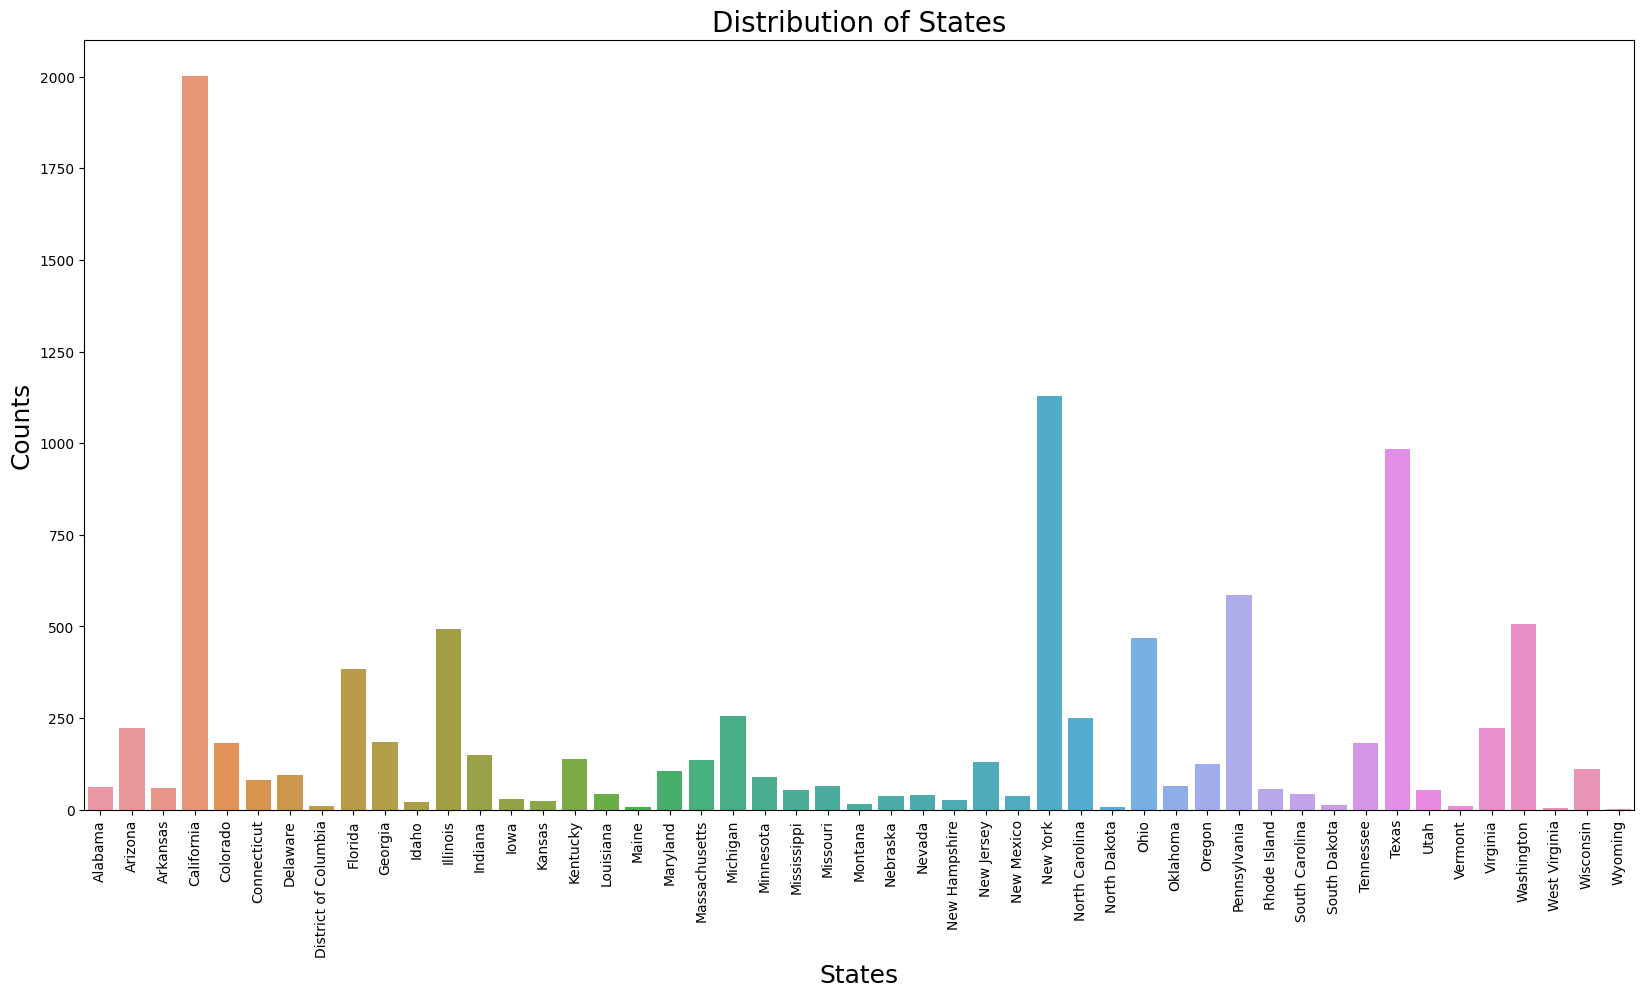

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x=d_frm['State'].sort_values(ascending=True))
plt.xticks(rotation=90)
plt.xlabel('States',fontsize=18)
plt.ylabel('Counts',fontsize=18)
plt.title("Distribution of States",fontsize=20)
plt.show()

####Profit distribution among states

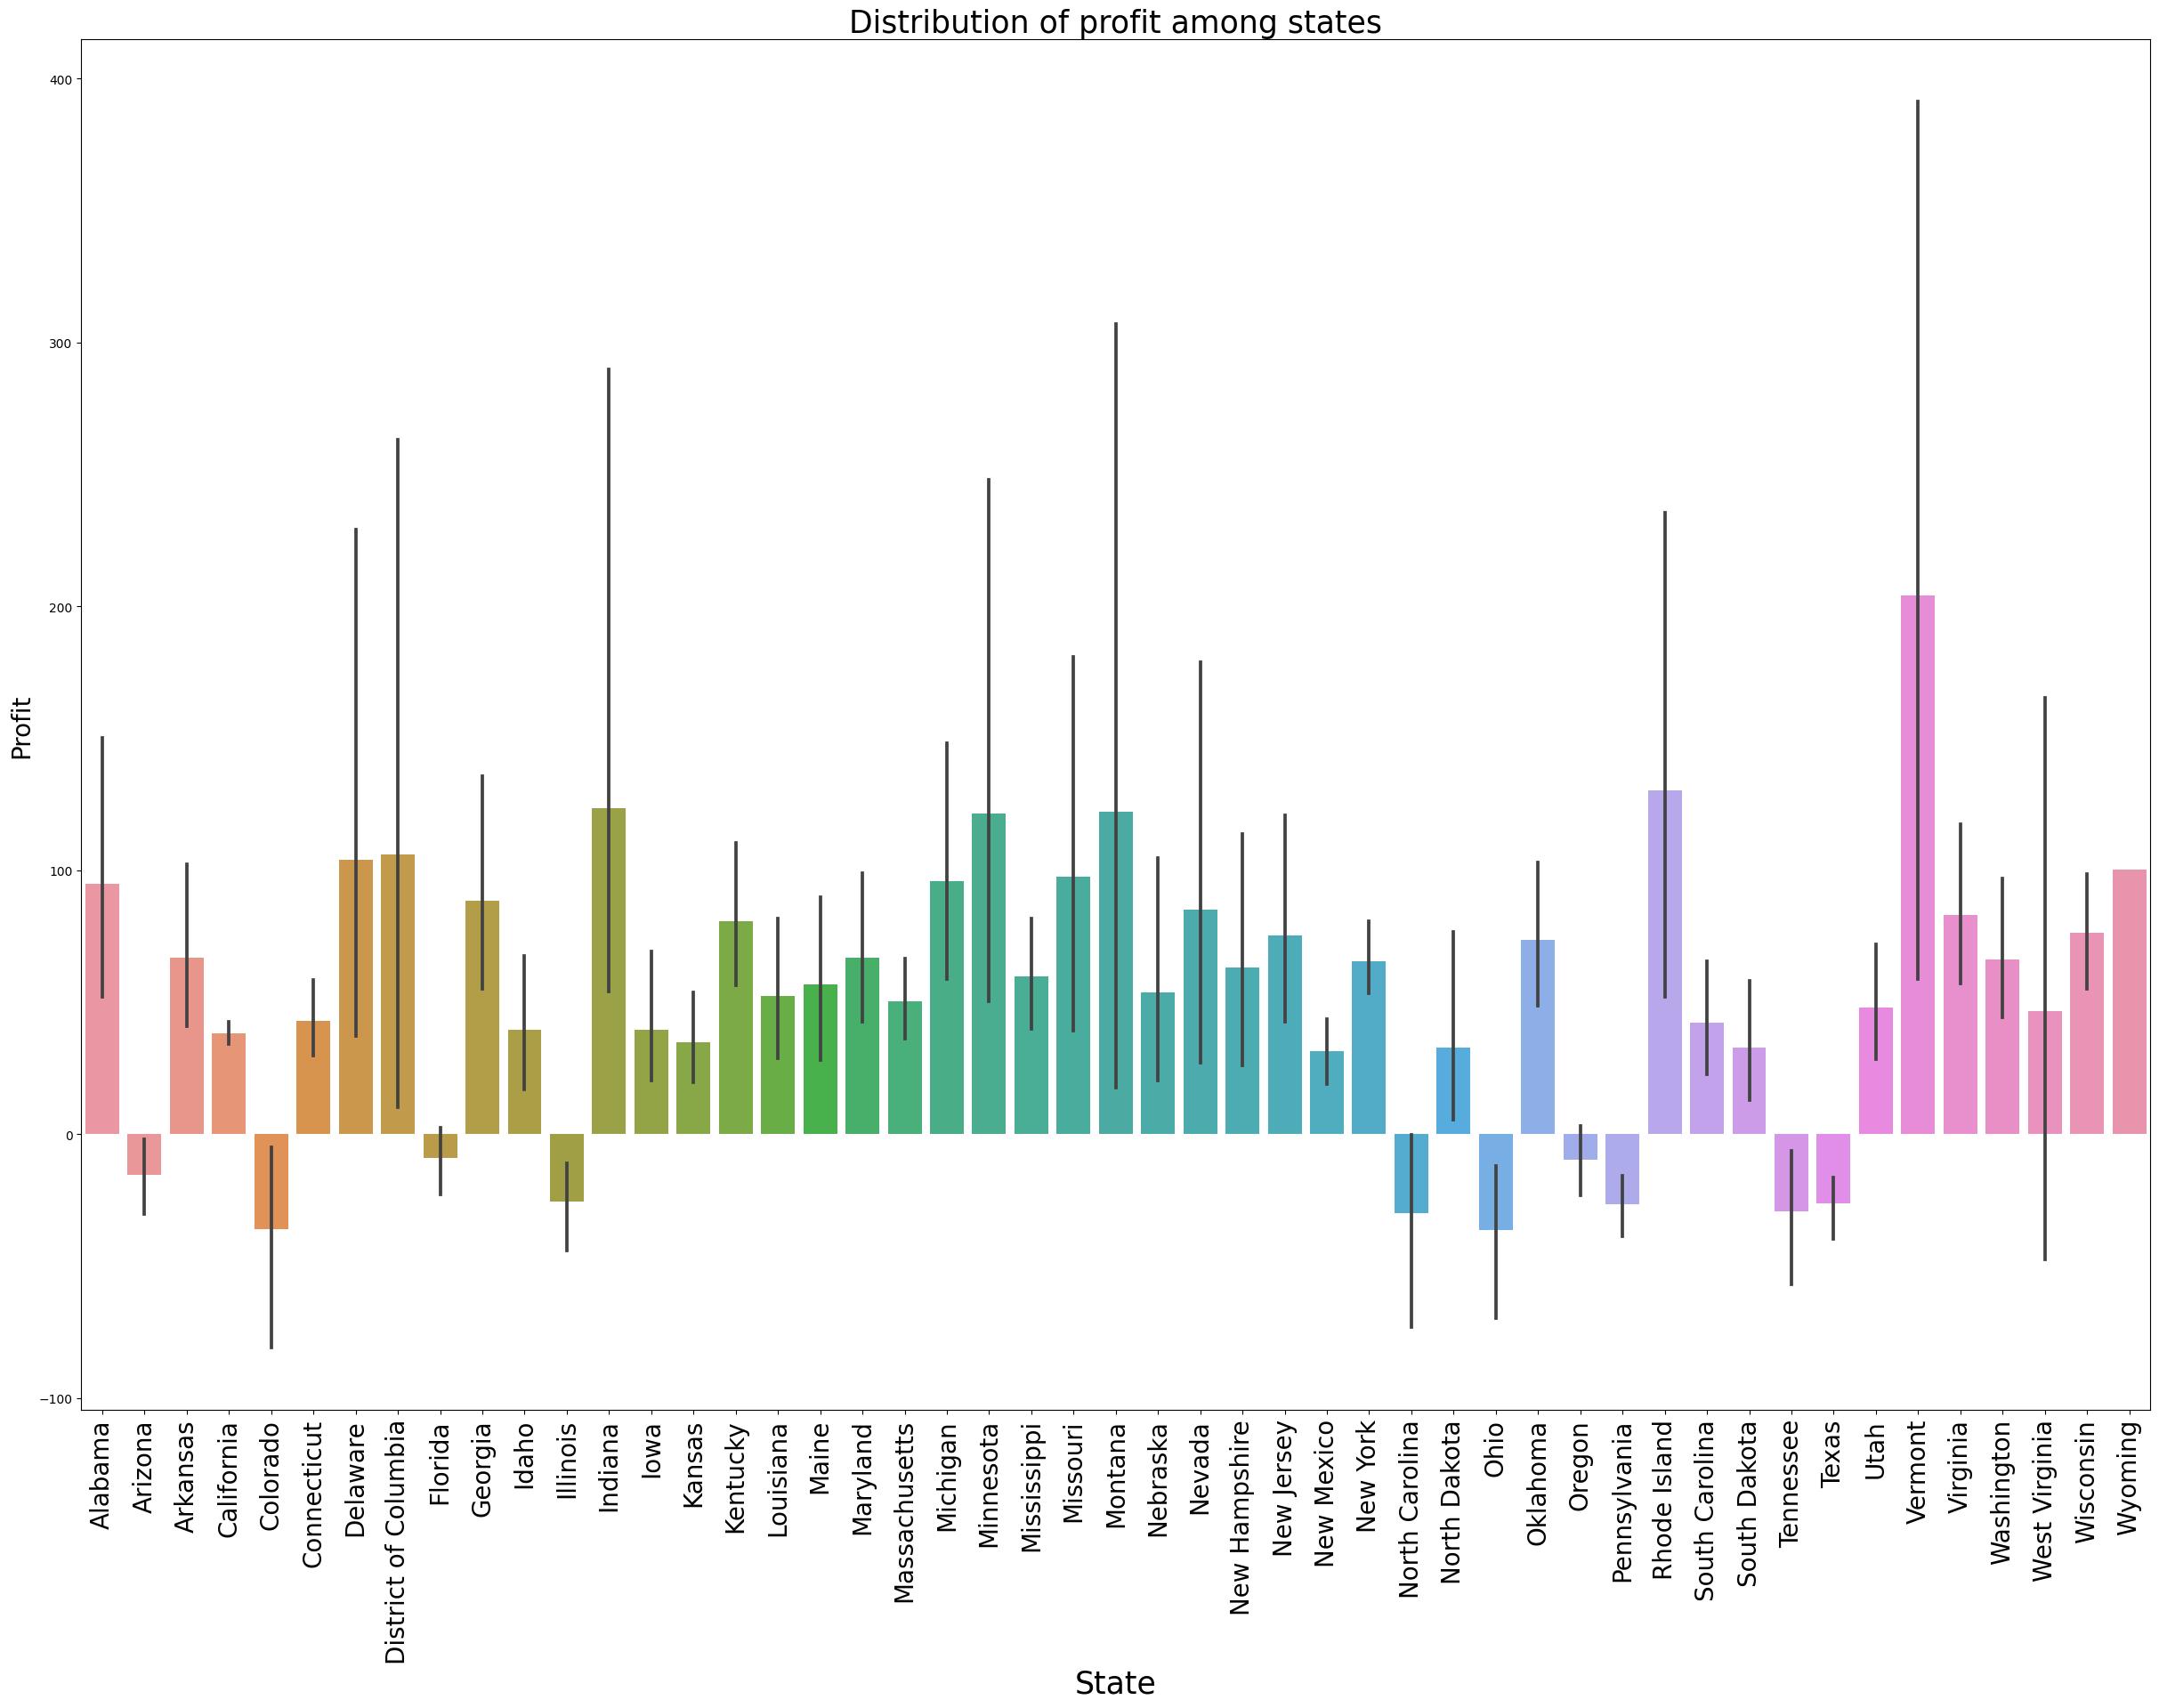

In [ ]:
plt.figure(figsize=(30,20))
sns.barplot(x=d_frm['State'].sort_values(ascending=True),y=d_frm['Profit'])
plt.title('Distribution of profit among states',fontsize=25)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel('State',fontsize=25)
plt.ylabel('Profit',fontsize=20)
plt.show()

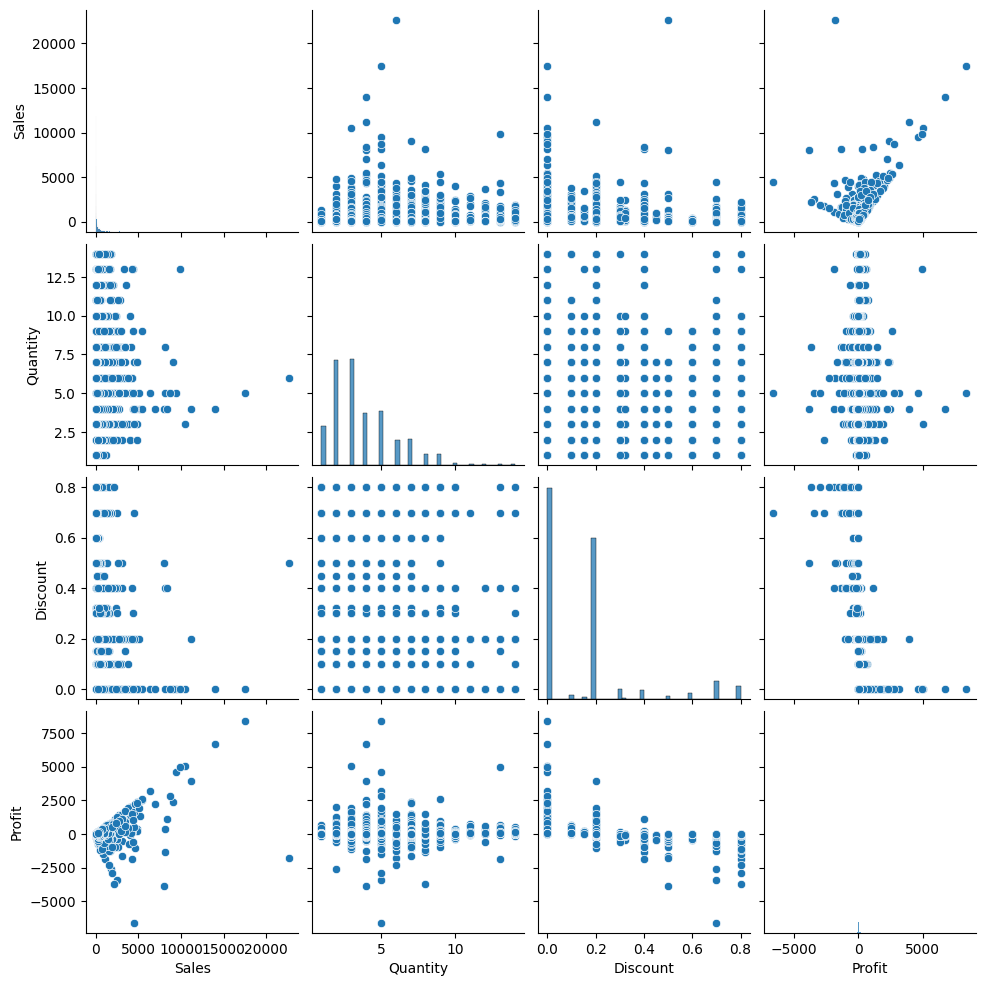

In [ ]:
sns.pairplot(d_frm)

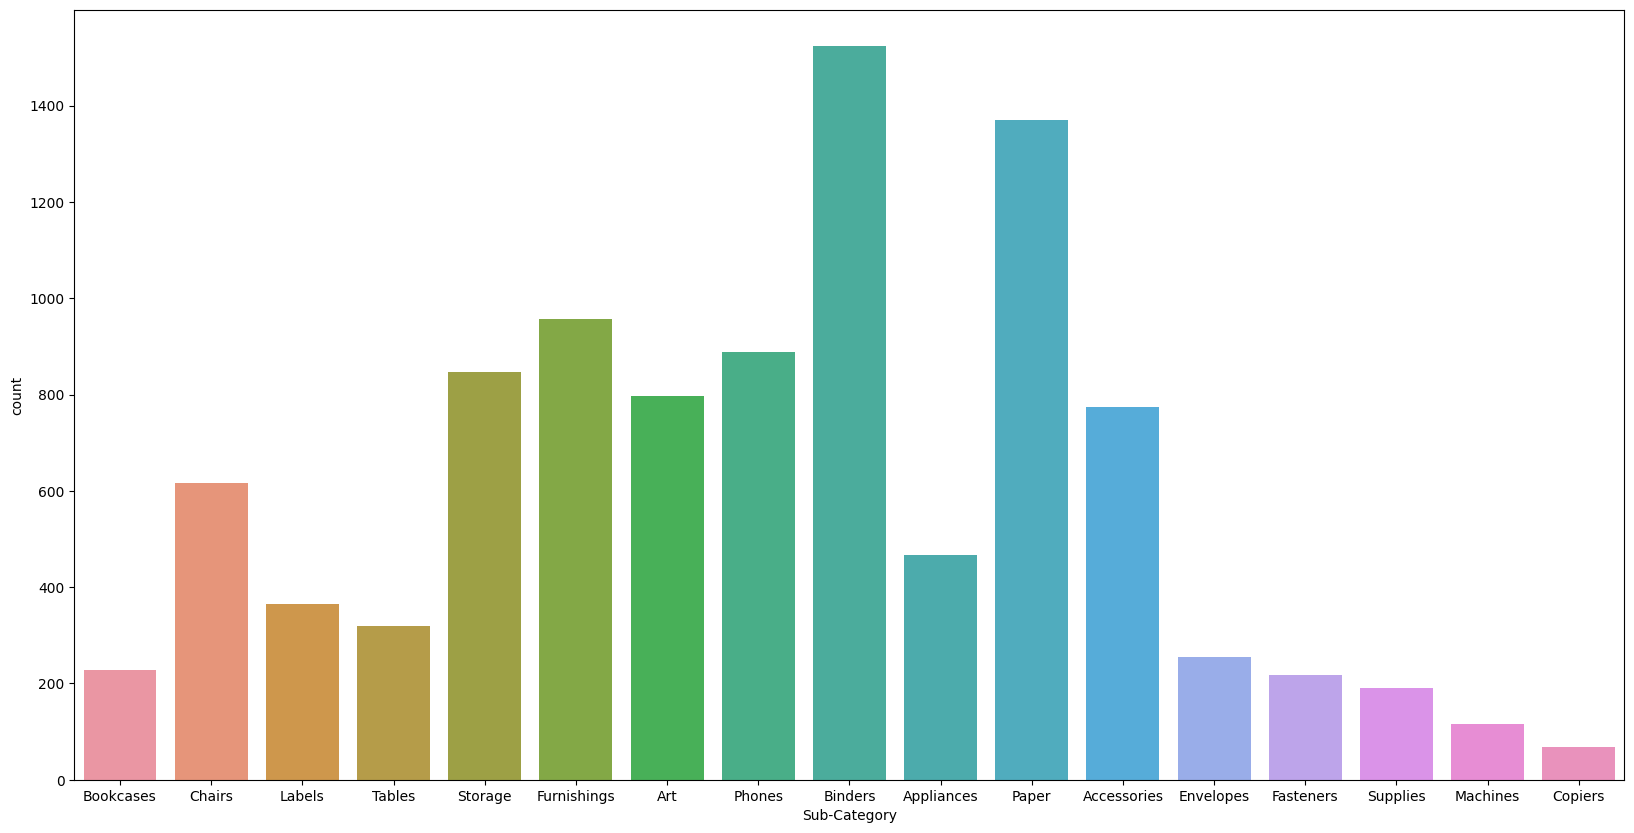

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x="Sub-Category",data=d_frm)
plt.show()

From the above barplot, it is very clear that the Copiers and Machines Subcategory need to be improved

#### loss in Sales


In [ ]:
loss_df=d_frm[d_frm['Profit'] < 0]
print("All loss sales: ")
loss_df.head(2)

All loss sales: 


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.031
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.858


In [ ]:
# displaying total loss
tot_loss=(loss_df['Profit'].sum())
print(tot_loss)

-156131.2857


In [ ]:
#loss in each segment
seg_loss=loss_df.groupby("Segment").sum().reset_index()
seg_loss

<ipython-input-25-1ee8e35a26a5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seg_loss=loss_df.groupby("Segment").sum().reset_index()


,Segment,Sales,Quantity,Discount,Profit
0,Consumer,247196.2460,3651,476.76,-84945.7112
1,Corporate,131860.5383,2191,272.00,-44787.2076
2,Home Office,89650.3705,1198,150.98,-26398.3669


<Axes: xlabel='Segment'>

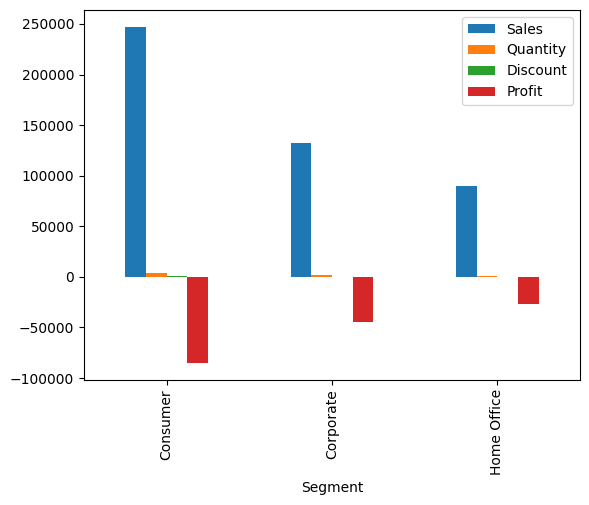

In [ ]:
seg_loss.plot.bar(x='Segment')

In [ ]:
reg_loss=loss_df.groupby("Region").sum().reset_index()

<ipython-input-27-e00d4334b10e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reg_loss=loss_df.groupby("Region").sum().reset_index()


In [ ]:
print(reg_loss)

    Region        Sales  Quantity  Discount      Profit
0  Central  141282.6588      2803    407.14 -56314.8850
1     East  160864.0120      1988    247.10 -49590.6075
2    South   91635.1850      1004    127.35 -27504.8323
3     West   74925.2990      1245    118.15 -22720.9609


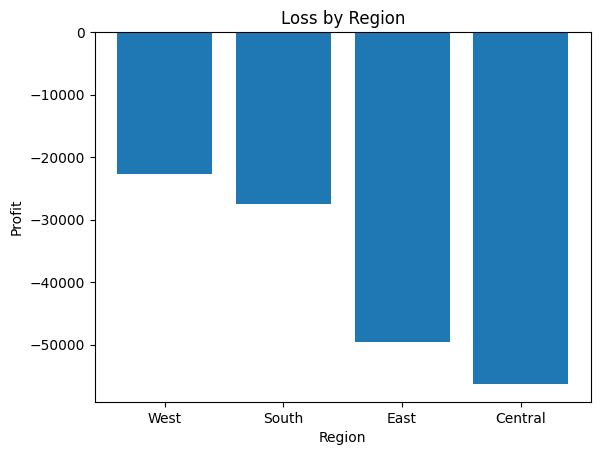

In [ ]:
plt.bar(reg_loss["Region"][::-1],reg_loss["Profit"][::-1])
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Loss by Region')
plt.show()


it is clear that the Central region suffered more losses follwed by East

#### Sales

<Axes: xlabel='Segment'>

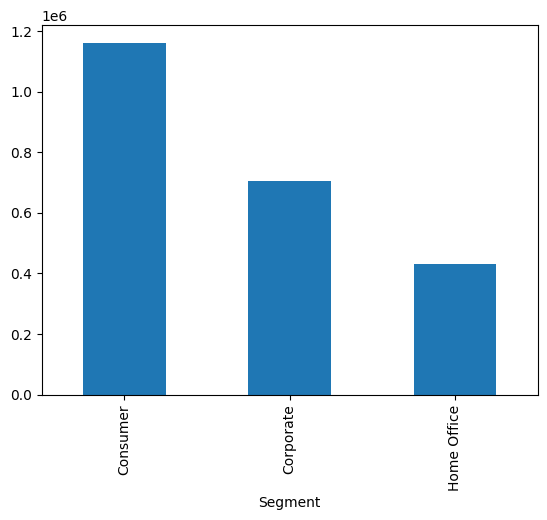

In [ ]:
sales_df=d_frm.groupby("Segment")["Sales"].sum()
sales_df.plot.bar()

#### Distribution based on Region

Text(0.5, 1.0, 'Distribution of Regions')

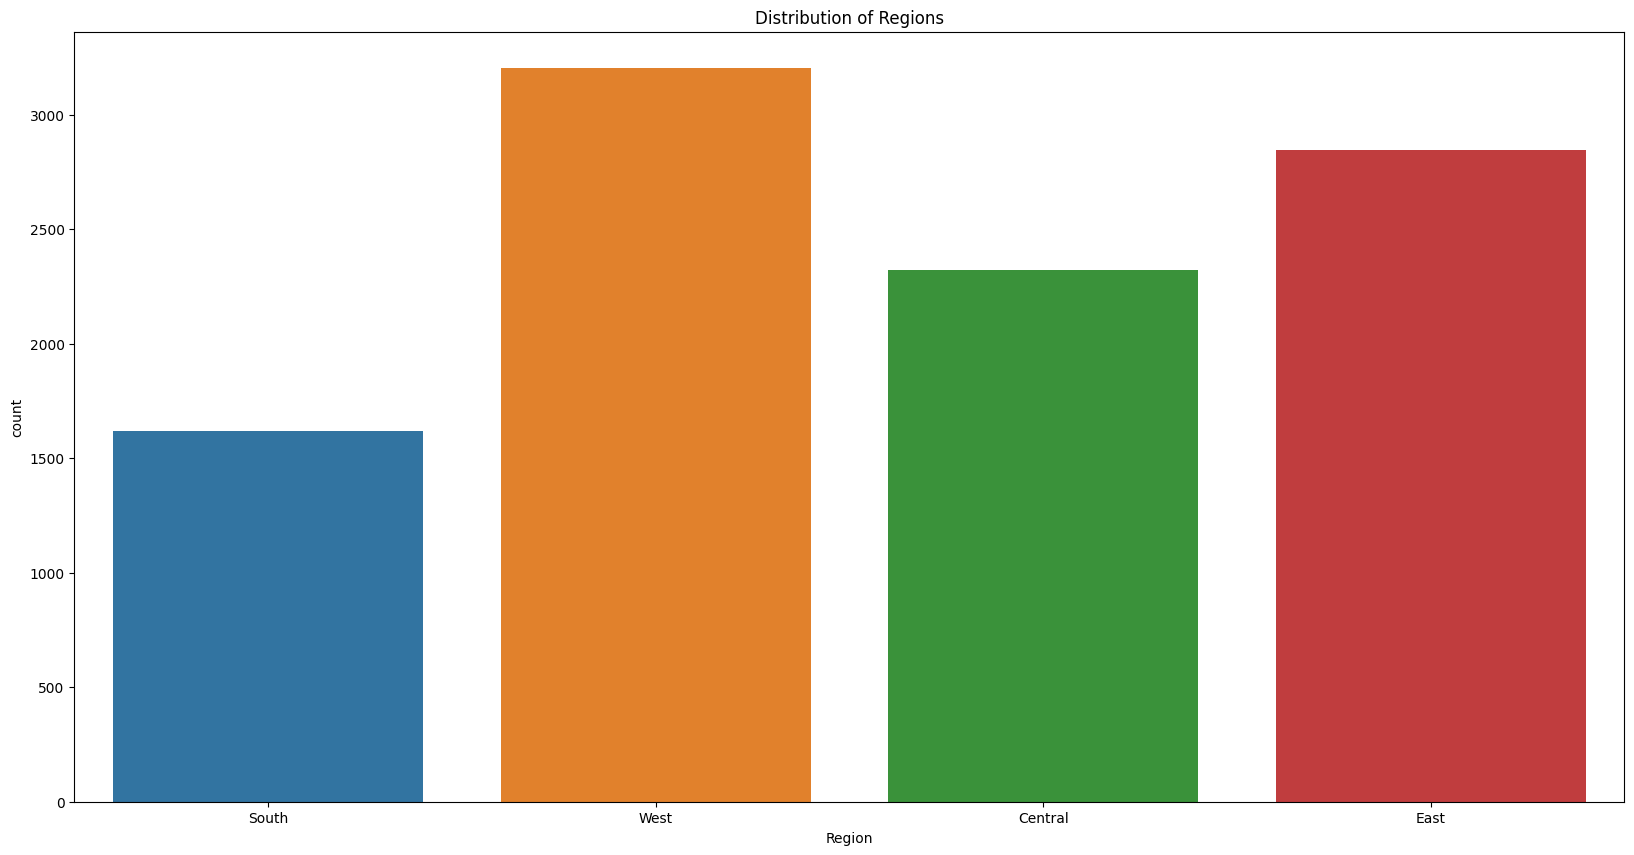

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data,x='Region')
plt.title('Distribution of Regions')

Text(0.5, 1.0, 'Distribution of Categories')

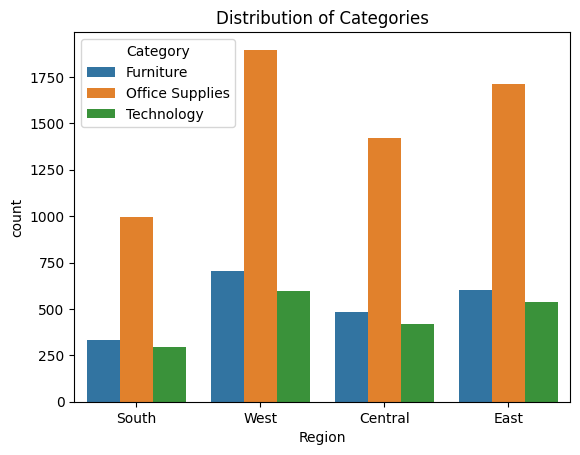

In [ ]:
sns.countplot(data=data,x='Region',hue='Category')
plt.title('Distribution of Categories')

Distribution based on Categories/Sub-Categories

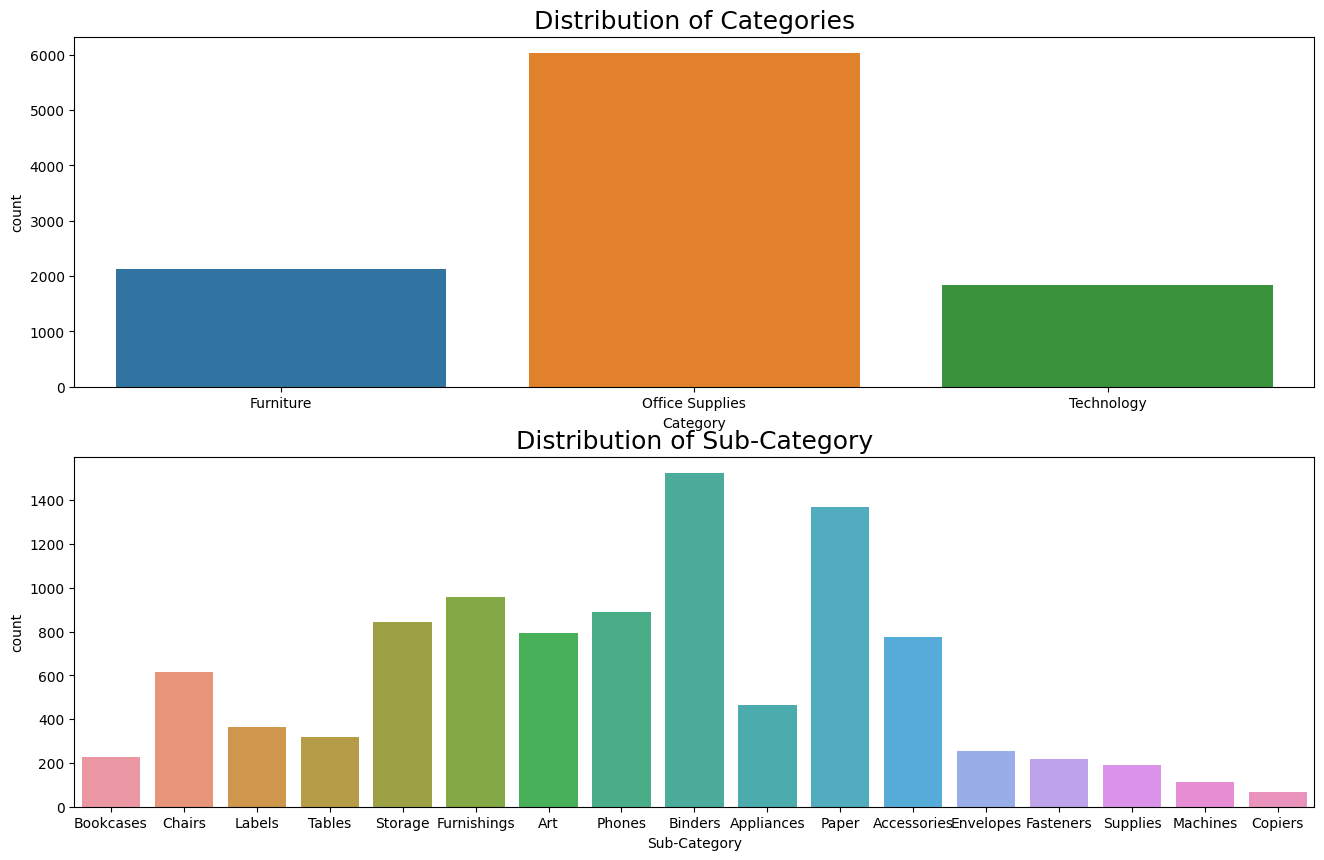

In [90]:
plt.figure(figsize=(16,10))
plt.subplot(2,1,1)
sns.countplot(data=d_frm,x='Category')
plt.title('Distribution of Categories',fontsize=18)
plt.subplot(2,1,2)
sns.countplot(data=d_frm,x='Sub-Category')
plt.title('Distribution of Sub-Category',fontsize=18)
plt.show()

In [ ]:
cat_df=d_frm.groupby("Sub-Category").sum().reset_index()
cat_df

<ipython-input-41-83c50242a9db>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cat_df=d_frm.groupby("Sub-Category").sum().reset_index()


,Sub-Category,Sales,Quantity,Discount,Profit
0,Accessories,167380.3180,2976,60.80,41936.6357
1,Appliances,107532.1610,1729,77.60,18138.0054
2,Art,27118.7920,3000,59.60,6527.7870
3,Binders,203412.7330,5974,567.00,30221.7633
4,Bookcases,114879.9963,868,48.14,-3472.5560
5,Chairs,328449.1030,2356,105.00,26590.1663
6,Copiers,149528.0300,234,11.00,55617.8249
7,Envelopes,16476.4020,906,20.40,6964.1767
8,Fasteners,3024.2800,914,17.80,949.5182
9,Furnishings,91705.1640,3563,132.40,13059.1436


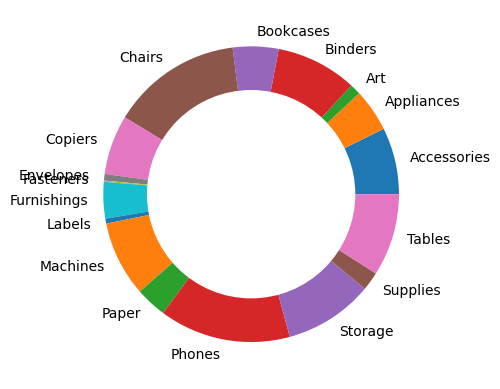

In [68]:
cat=list(cat_df["Sub-Category"])
sales=list(cat_df["Sales"])
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(sales,labels=cat)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

<Axes: ylabel='Sub-Category'>

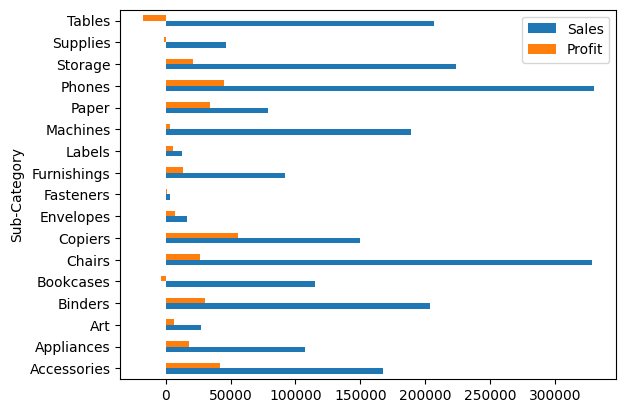

In [76]:
# sales and profit based on their sub-category
# We can see that [Tables,Supplies,Bookcases has loss
cat_df.plot.barh(x="Sub-Category",y=["Sales","Profit"])